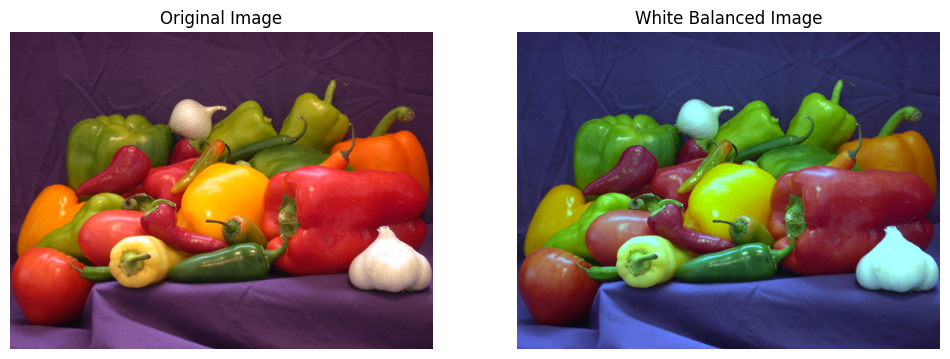

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def white_balance_gray_world(img):
    """
    Apply white balancing using the Gray World assumption.
    """
    # Convert image to float for calculations
    result = img.copy().astype(np.float32)

    # Compute the average for each channel
    avg_b = np.mean(result[:, :, 0])
    avg_g = np.mean(result[:, :, 1])
    avg_r = np.mean(result[:, :, 2])

    # Compute the overall average
    avg_gray = (avg_b + avg_g + avg_r) / 3

    # Scale each channel based on the average
    result[:, :, 0] = result[:, :, 0] * (avg_gray / avg_b)
    result[:, :, 1] = result[:, :, 1] * (avg_gray / avg_g)
    result[:, :, 2] = result[:, :, 2] * (avg_gray / avg_r)

    # Clip values to be in valid range
    result = np.clip(result, 0, 255).astype(np.uint8)

    return result

# Load the image
image = cv2.imread('/content/peppers.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

# Apply white balancing
balanced_image = white_balance_gray_world(image)

# Show original and balanced images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(balanced_image)
plt.title('White Balanced Image')
plt.axis('off')

plt.show()
